<p style="text-align: center;"><img src="https://upload.wikimedia.org/wikipedia/pt/1/1f/ITA_logo.png" alt="Resultado de imagem para logo ita" width="209" height="79" /></p>
<p style="text-align: center;"><span style="font-size: 14pt;">Instituto Tecnol&oacute;gico de Aeron&aacute;utica</span></p>
<p style="text-align: center;"><span style="font-size: 14pt;">P&oacute;s-Gradua&ccedil;&atilde;o em Engenharia Eletr&ocirc;nica e Computa&ccedil;&atilde;o</span></p>
<p style="text-align: center;"><span style="font-size: 14pt;"><strong>Orientador:</strong> Paulo Marcelo Tasinaffo</span></p>
<p style="text-align: center;"><span style="font-size: 14pt;"><strong>Co-orientador:</strong> Rodrigo Arnaldo Scarpel</span></p>
<p style="text-align: center;"><span style="font-size: 14pt;"><strong>Aluna:</strong> Bruna dos Santos Almeida</span></p>


## Generate a random n-class classification problem.

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

## Define dataset

In [ ]:
weights_list = [0.5, 0.7, 0.8, 0.9]
flip_y_list = [0.01, 0.5, 0.8]
n_features = [5, 50, 100]

In [ ]:
parameters_list = []
for weight in weights_list:
    for flip_y in flip_y_list:
        for n_feature in n_features:
            parameters_ = { 'n_samples_' : 10000,
                  'n_features_' : n_feature,
                  'n_informative_' : 2,
                  'n_redundant_'  : 2,
                  'random_state_' : 2,
                  'n_classes_' : 2,
                  'n_clusters_per_class_' : 2,
                  'weights_' : (weight,),
                  'class_sep' : 1,
                  'flip_y_' : flip_y,
                  'hypercube_': True,
                  'shuffle': True}
            parameters_list.append(parameters_)

In [ ]:
parameters_list[3]

{'n_samples_': 10000,
 'n_features_': 5,
 'n_informative_': 2,
 'n_redundant_': 2,
 'random_state_': 2,
 'n_classes_': 2,
 'n_clusters_per_class_': 2,
 'weights_': (0.5,),
 'class_sep': 1,
 'flip_y_': 0.5,
 'hypercube_': True,
 'shuffle': True}

In [ ]:
len(parameters_list)

36

In [ ]:
X_list = []
y_list = []
index_list = []
for parameters_ in parameters_list:
    X, y = make_classification(n_samples = parameters_['n_samples_'], 
                           n_features = parameters_['n_features_'], 
                           n_informative = parameters_['n_informative_'], 
                           n_redundant = parameters_['n_redundant_'], 
                           random_state = parameters_['random_state_'], 
                           n_classes = parameters_['n_classes_'],
                           weights = parameters_['weights_'],
                           flip_y = parameters_['flip_y_'],
                           hypercube = parameters_['hypercube_'],
                           shuffle = parameters_['shuffle'])
    X_list.append(X)
    y_list.append(y)

In [ ]:
for item in range(len(X_list)):
    data = pd.DataFrame(data=X_list[item])
    data['target'] = y_list[item] 
    name = "data/data_synthetic_" + str(item+1) + ".csv"
    data.to_csv(name, index=False)
    print(name)

data/data_synthetic_1.csv
data/data_synthetic_2.csv
data/data_synthetic_3.csv
data/data_synthetic_4.csv
data/data_synthetic_5.csv


## Summarize the dataset

In [ ]:
import plotly.express as px

In [ ]:
type(X)

In [ ]:
print(X.shape, y.shape)

In [ ]:
import pandas as pd

In [ ]:
graph = pd.DataFrame(y)
graph_d = pd.DataFrame(y_d)

In [ ]:
ax = graph.plot.hist(bins=12, alpha=0.5)

In [ ]:
ax_d = graph_d.plot.hist(bins=12, alpha=0.5)

# Split into train test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.25)

### Summarize the shape of the train and test sets

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


In [ ]:
print(X_train_d.shape, X_test_d.shape, y_train_d.shape, y_test_d.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


# Creating a Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from google.colab import drive
from sklearn.utils import class_weight

# Deep Learning Libraries
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Metrics

In [ ]:
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn')
]

In [ ]:
COLUMNS = ['id','layers', 'node per layer', 'accuracy', 'val_accuracy', 'loss', 'val_loss', 'auc', 'val_auc','precision', 'val_precision', 'recall', 'val_recall','tp', 'val_tp', 'fp', 'val_fp', 'tn', 'val_tn']
describe_models = pd.DataFrame(columns = COLUMNS)
describe_models = describe_models.set_index(['id'])

## Callback

In [ ]:
early_stopping_monitor = EarlyStopping(patience=10)

## Model

In [ ]:
EPOCHS = 50
n_cols = X.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = (n_cols,)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=METRICS)

In [ ]:
historical = model.fit(X_train, 
                       y_train, 
                       epochs=EPOCHS, 
                       validation_split=0.2, 
                       callbacks = [early_stopping_monitor])

Epoch 1/50
175/175 [==============================] - 4s 9ms/step - loss: 1.0637 - accuracy: 0.5378 - precision: 0.5480 - recall: 0.3391 - auc: 0.5641 - tp: 534.1989 - fp: 366.1818 - tn: 1052.1023 - fn: 879.3352 - val_loss: 0.4792 - val_accuracy: 0.7729 - val_precision: 0.7925 - val_recall: 0.7454 - val_auc: 0.8584 - val_tp: 527.0000 - val_fp: 138.0000 - val_tn: 555.0000 - val_fn: 180.0000
Epoch 2/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4385 - accuracy: 0.8048 - precision: 0.8004 - recall: 0.7988 - auc: 0.8821 - tp: 1141.6875 - fp: 261.6932 - tn: 1169.1193 - fn: 259.3182 - val_loss: 0.3066 - val_accuracy: 0.8929 - val_precision: 0.8863 - val_recall: 0.9038 - val_auc: 0.9507 - val_tp: 639.0000 - val_fp: 82.0000 - val_tn: 611.0000 - val_fn: 68.0000
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8889 - precision: 0.8728 - recall: 0.9076 - auc: 0.9487 - tp: 1271.7500 - fp: 168.3409 - tn: 1264.6648 - fn: 127.0625 - 

In [ ]:
historical_d = model.fit(X_train_d, 
                       y_train_d, 
                       epochs=EPOCHS, 
                       validation_split=0.2, 
                       callbacks = [early_stopping_monitor])

Epoch 1/50
175/175 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9841 - precision: 0.9661 - recall: 0.9550 - auc: 0.9883 - tp: 1083.0000 - fp: 38.0000 - tn: 4428.0000 - fn: 51.0000 - val_loss: 0.0686 - val_accuracy: 0.9814 - val_precision: 0.9624 - val_recall: 0.9412 - val_auc: 0.9915 - val_tp: 256.0000 - val_fp: 10.0000 - val_tn: 1118.0000 - val_fn: 16.0000
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9848 - precision: 0.9729 - recall: 0.9515 - auc: 0.9884 - tp: 1079.0000 - fp: 30.0000 - tn: 4436.0000 - fn: 55.0000 - val_loss: 0.0710 - val_accuracy: 0.9814 - val_precision: 0.9624 - val_recall: 0.9412 - val_auc: 0.9909 - val_tp: 256.0000 - val_fp: 10.0000 - val_tn: 1118.0000 - val_fn: 16.0000
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9854 - precision: 0.9791 - recall: 0.9480 - auc: 0.9891 - tp: 1075.0000 - fp: 23.0000 - tn: 4443.0000 - fn: 59.0000 - val_l

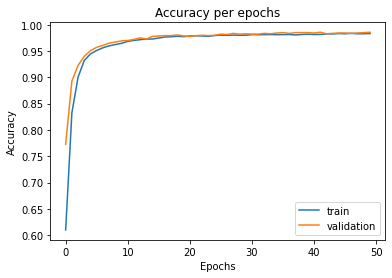

In [ ]:
plt.plot(historical.history['accuracy'])
plt.plot(historical.history['val_accuracy'])
plt.title('Accuracy per epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

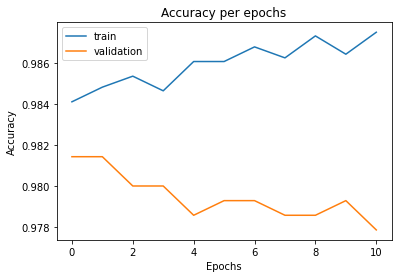

In [ ]:
plt.plot(historical_d.history['accuracy'])
plt.plot(historical_d.history['val_accuracy'])
plt.title('Accuracy per epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()